In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_auc_score

from imblearn.over_sampling import SMOTE

 

Using TensorFlow backend.


In [2]:
data=pd.read_csv('C2T1_Train.csv')
test=pd.read_csv('C2T1_Test.csv')

In [3]:
data.head()

,encounter_id2,patient_nbr2,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,5283,48330653,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
1,8499,63555809,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
2,9441,42519137,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3,20997,89868902,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
4,28515,82637321,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [4]:
#Replace '?' with NaN value
data=data.replace({'?':np.nan})
test=test.replace({'?':np.nan})

In [5]:
def missing_vals_per(data):
    missing_vals=100*data.isna().sum()/len(data)
    #missing_vals=missing_vals[missing_vals.values != 0]
    return missing_vals.sort_values(ascending=False)    

In [6]:
missing_vals_per(data)

weight                      96.776326
medical_specialty           48.117136
payer_code                  42.670163
race                         2.431527
diag_3                       1.495053
diag_2                       0.370183
diag_1                       0.018729
num_procedures               0.000000
max_glu_serum                0.000000
number_diagnoses             0.000000
number_inpatient             0.000000
number_emergency             0.000000
number_outpatient            0.000000
num_medications              0.000000
readmitted                   0.000000
num_lab_procedures           0.000000
diabetesMed                  0.000000
time_in_hospital             0.000000
admission_source_id          0.000000
discharge_disposition_id     0.000000
admission_type_id            0.000000
age                          0.000000
gender                       0.000000
patient_nbr2                 0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide 

In [7]:
col_uniq_vals={}

In [8]:
def unique_vals(data):
    for col in list(data.columns):
        if col not in ['encounter_id2','patient_nbr2']:
            n = data[col].unique()
            if len(n)<=10:
                print(col," : ", n)
            else:
                print(col + ': ' +str(len(n)) + ' unique values')
            col_uniq_vals[col]=len(n)


In [9]:
unique_vals(data)

race  :  ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender  :  ['Female' 'Male' 'Unknown/Invalid']
age  :  ['[80-90)' '[90-100)' '[40-50)' '[50-60)' '[60-70)' '[70-80)' '[20-30)'
 '[10-20)' '[30-40)' '[0-10)']
weight  :  [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id  :  [2 3 1 6 4 5 8 7]
discharge_disposition_id: 26 unique values
admission_source_id: 17 unique values
time_in_hospital: 14 unique values
payer_code: 18 unique values
medical_specialty: 72 unique values
num_lab_procedures: 118 unique values
num_procedures  :  [2 3 0 6 1 5 4]
num_medications: 74 unique values
number_outpatient: 36 unique values
number_emergency: 33 unique values
number_inpatient: 21 unique values
diag_1: 701 unique values
diag_2: 734 unique values
diag_3: 770 unique values
number_diagnoses: 16 unique values
max_glu_serum  :  ['None' '>300' 'Norm' '>200']
A1Cresult  :  ['None' '>7' '>8' 'Norm']
metformin  :  ['No' 'S

In [10]:
pd.DataFrame.from_dict(col_uniq_vals,orient='index',columns=['No. Of Unique Values'])

,No. Of Unique Values
race,6
gender,3
age,10
weight,10
admission_type_id,8
discharge_disposition_id,26
admission_source_id,17
time_in_hospital,14
payer_code,18
medical_specialty,72


In [11]:
#Count of unique values in eaach column
for col in list(data.columns):
    
    print(pd.DataFrame(data[col].value_counts()))

           encounter_id2
55969791               1
44499573               1
65954457               1
206777589              1
134771355              1
...                  ...
161729067              1
61152585               1
215568897              1
28249419               1
41289729               1

[90766 rows x 1 columns]
          patient_nbr2
88785761            34
43140776            25
1660163             23
23643275            22
23198891            22
...                ...
54587165             1
91096871             1
17045285             1
6561572              1
5638145              1

[65765 rows x 1 columns]
                  race
Caucasian        67515
AfricanAmerican  17267
Hispanic          1834
Other             1358
Asian              585
                 gender
Female            48748
Male              42015
Unknown/Invalid       3
            age
[70-80)   23309
[60-70)   20028
[50-60)   15421
[80-90)   15186
[40-50)    8640
[30-40)    3403
[90-100)   2481
[20-30)   

        rosiglitazone
No              85235
Steady           5299
Up                154
Down               78
        acarbose
No         90495
Steady       261
Up             9
Down           1
        miglitol
No         90733
Steady        26
Down           5
Up             2
        troglitazone
No             90763
Steady             3
        tolazamide
No           90727
Steady          38
Up               1
    examide
No    90766
    citoglipton
No        90766
        insulin
No        42793
Steady    27876
Down      10487
Up         9610
        glyburide-metformin
No                    90199
Steady                  554
Up                        7
Down                      6
        glipizide-metformin
No                    90758
Steady                    8
        glimepiride-pioglitazone
No                         90765
Steady                         1
        metformin-rosiglitazone
No                        90764
Steady                        2
        metformin-pioglita

In [12]:
def drop_cols(data):
    
    #Drop Columns with more than 40% missing values of entire dataset
    data=data.drop(['weight','medical_specialty','payer_code'], axis = 1)
    
    #Drop entries with missing values of perticular columns
    data=data.dropna(subset=['race','diag_1','diag_2','diag_3'])
    
    #Remove the only entry for Gender = Unknown/Invalid
    data= data[data.gender != 'Unknown/Invalid']
    
    #Remove columns which gives no information i.e which has only one value in entire column
    data=data.drop(['examide','citoglipton','metformin-rosiglitazone'],axis=1)
    
    #Remove columns which gives almost no information i.e. which has a perticular value in almost all of the entries except a few entries
    data=data.drop(['acetohexamide','glimepiride-pioglitazone','metformin-pioglitazone'],axis=1)
    
    data.loc[data['diag_1'].str.contains('V',na=False), 'diag_1'] = 1000
    data.loc[data['diag_1'].str.contains('E',na=False), 'diag_1'] = 1100
    
    data.loc[data['diag_2'].str.contains('V',na=False), 'diag_2'] = 1000
    data.loc[data['diag_2'].str.contains('E',na=False), 'diag_2'] = 1100
    
    data.loc[data['diag_3'].str.contains('V',na=False), 'diag_3'] = 1000
    data.loc[data['diag_3'].str.contains('E',na=False), 'diag_3'] = 1100
    
    
    
    return data
    
    
    

In [13]:
test=test.rename(columns={'encounter_id':'encounter_id2','patient_nbr':'patient_nbr2'})

In [14]:
data1=drop_cols(data)

In [15]:
test1=drop_cols(test)

In [16]:
data2=data1.copy()

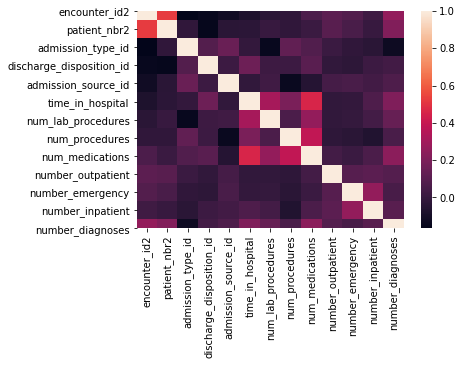

In [17]:
corr = data2.corr()
sns.heatmap(corr)

In [18]:
numeric = list(data2._get_numeric_data().columns)
numeric

['encounter_id2',
 'patient_nbr2',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [19]:
non_numeric=[x for x in list(data2.columns) if x not in list(data2._get_numeric_data().columns)]
non_numeric

['race',
 'gender',
 'age',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'change',
 'diabetesMed',
 'readmitted']

In [20]:
med_cols=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin']

In [21]:
def cat_to_num(data):
    data['gender']=data['gender'].replace('Male',int(0))
    data['gender']=data['gender'].replace('Female',int(1))
    
    data['race']=data['race'].replace('Caucasian',int(0))
    data['race']=data['race'].replace('AfricanAmerican',int(1))
    data['race']=data['race'].replace('Hispanic',int(2))
    data['race']=data['race'].replace('Asian',int(3))
    data['race']=data['race'].replace('Other',int(4))
    
    
    for i in range(0,10):
        data['age']=data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', int(i+1))
        
    data['max_glu_serum']=data['max_glu_serum'].replace('None',int(0))
    data['max_glu_serum']=data['max_glu_serum'].replace('Norm',int(1))
    data['max_glu_serum']=data['max_glu_serum'].replace('>200',int(2))
    data['max_glu_serum']=data['max_glu_serum'].replace('>300',int(3))
    
    data['A1Cresult']=data['A1Cresult'].replace('None',int(0))
    data['A1Cresult']=data['A1Cresult'].replace('Norm',int(1))
    data['A1Cresult']=data['A1Cresult'].replace('>7',int(2))
    data['A1Cresult']=data['A1Cresult'].replace('>8',int(3))
    
    data['change']=data['change'].replace('No',int(0))
    data['change']=data['change'].replace('Ch',int(1))
    
    data['diabetesMed']=data['diabetesMed'].replace('No',int(0))
    data['diabetesMed']=data['diabetesMed'].replace('Yes',int(1))
    
    for col in med_cols:
        data[col] = data[col].apply(lambda x: 0 if (x == 'No') else 1)
        
    data['readmitted']=data['readmitted'].replace('NO',int(0))
    data['readmitted']=data['readmitted'].replace('<30',int(1))
    data['readmitted']=data['readmitted'].replace('>30',int(2))
    
    
    

    

In [22]:
cat_to_num(data2)

In [23]:
cat_to_num(test1)

In [24]:
X=data2.drop(['encounter_id2','patient_nbr2','readmitted'], axis = 1)
Y=data2['readmitted']

In [25]:
print('Original dataset shape {}'.format(Counter(Y)))

#Over sample using SMOTE to handle imbalanced data
smt = SMOTE(random_state=40)
X_smt, Y_smt = smt.fit_sample(X, Y)
print('New dataset shape {}'.format(Counter(Y_smt)))


Original dataset shape Counter({0: 46929, 2: 30372, 1: 9893})
New dataset shape Counter({0: 46929, 2: 46929, 1: 46929})


In [26]:
num_cols=X_smt._get_numeric_data().columns

In [27]:
X2=X_smt.copy()
X3=X.copy()
X2[num_cols] = StandardScaler().fit_transform(X2[num_cols])
X3[num_cols] = StandardScaler().fit_transform(X3[num_cols])


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X2, Y_smt, test_size=0.30, random_state=41)

In [29]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier(max_depth=100, criterion = "entropy")
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
decisiontree_pred = decisiontree.predict(X_val)
print("Decision Tree Classifier Accuracy : {0:.2f}".format(accuracy_score(y_val, decisiontree_pred)))

Decision Tree Classifier Accuracy : 0.52


In [31]:
#Basic RandomForest Classifier

rf_base = RandomForestClassifier(n_estimators = 100, max_depth=None,verbose=1,n_jobs=4)

print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(rf_base, X_train, y_train, cv=10))))

rf_base.fit(X_train, y_train)
y_pred= rf_base.predict(X_val)


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 100

Cross Validation score: 62.60%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    4.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [32]:
print("Basic RF Classifier Accuracy : {0:.2f}".format(accuracy_score(y_val, y_pred)))
print("Basic RF Classifier Precision : {0:.2f}".format(precision_score(y_val, y_pred,average='micro')))


Basic RF Classifier Accuracy : 0.63
Basic RF Classifier Precision : 0.63


In [33]:
from sklearn.metrics import confusion_matrix
labels = ['No','<30','>30']
cm = confusion_matrix(y_val, y_pred )
cm = pd.DataFrame(cm, index=labels, columns=labels)


In [34]:
cm

,No,<30,>30
No,9639,1164,3165
<30,1727,10861,1601
>30,4922,3017,6141


In [35]:
#Find the best hyperparameters for RF Classifier using Random search CV 

X_train, x_val, Y_train, y_val = train_test_split(X3, Y, test_size=0.30, random_state=41)
from sklearn.model_selection import RandomizedSearchCV

rf=RandomForestClassifier(verbose=2)

n_estimators = list(np.linspace(100,1000,num=10,dtype=int))

max_depth = list(np.linspace(100, 400, num = 8, dtype=int))
max_depth.append(None)

random_grid = {
 'n_estimators': n_estimators,
 'max_depth': max_depth
 }

rfc_cv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=40, n_jobs = 4)
# Fit the model


In [36]:
rfc_cv.fit(X_train, Y_train)
#Best Hyperparmeters values 
print(rfc_cv.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  7.2min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 16.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 800
building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
building tree 27 of 800
building tree 28 of 800
building tree 29 of 800
building tree 30 of 800
building tree 31 of 800
building tree 32 of 800
building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800
building tree 40 of 800
building tree 41 of 800
building tree 42 of 800
b

building tree 335 of 800
building tree 336 of 800
building tree 337 of 800
building tree 338 of 800
building tree 339 of 800
building tree 340 of 800
building tree 341 of 800
building tree 342 of 800
building tree 343 of 800
building tree 344 of 800
building tree 345 of 800
building tree 346 of 800
building tree 347 of 800
building tree 348 of 800
building tree 349 of 800
building tree 350 of 800
building tree 351 of 800
building tree 352 of 800
building tree 353 of 800
building tree 354 of 800
building tree 355 of 800
building tree 356 of 800
building tree 357 of 800
building tree 358 of 800
building tree 359 of 800
building tree 360 of 800
building tree 361 of 800
building tree 362 of 800
building tree 363 of 800
building tree 364 of 800
building tree 365 of 800
building tree 366 of 800
building tree 367 of 800
building tree 368 of 800
building tree 369 of 800
building tree 370 of 800
building tree 371 of 800
building tree 372 of 800
building tree 373 of 800
building tree 374 of 800


building tree 665 of 800
building tree 666 of 800
building tree 667 of 800
building tree 668 of 800
building tree 669 of 800
building tree 670 of 800
building tree 671 of 800
building tree 672 of 800
building tree 673 of 800
building tree 674 of 800
building tree 675 of 800
building tree 676 of 800
building tree 677 of 800
building tree 678 of 800
building tree 679 of 800
building tree 680 of 800
building tree 681 of 800
building tree 682 of 800
building tree 683 of 800
building tree 684 of 800
building tree 685 of 800
building tree 686 of 800
building tree 687 of 800
building tree 688 of 800
building tree 689 of 800
building tree 690 of 800
building tree 691 of 800
building tree 692 of 800
building tree 693 of 800
building tree 694 of 800
building tree 695 of 800
building tree 696 of 800
building tree 697 of 800
building tree 698 of 800
building tree 699 of 800
building tree 700 of 800
building tree 701 of 800
building tree 702 of 800
building tree 703 of 800
building tree 704 of 800


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.2min finished


In [37]:

X_train, X_val, y_train, y_val = train_test_split(X2, Y_smt, test_size=0.30, random_state=41)

rfc_best = RandomForestClassifier(n_estimators=800, max_depth=357)
rfc_best.fit(X_train, y_train)
rfc_predict_best = rfc_best.predict(X_val)


In [38]:
print("Best RF Accuracy : {0:.2f}".format(accuracy_score(y_val, rfc_predict_best)))
print("Best RF Precision : {0:.2f}".format(precision_score(y_val, rfc_predict_best,average='micro')))
print("Best RF Recall : {0:.2f}".format(recall_score(y_val, rfc_predict_best,average='micro' )))

Best RF Accuracy : 0.64
Best RF Precision : 0.64
Best RF Recall : 0.64


In [39]:
#Confusion Matrix for Best RF Classifier
cm = confusion_matrix(y_val, rfc_predict_best )
cm = pd.DataFrame(cm, index=labels, columns=labels)
cm

,No,<30,>30
No,9775,1109,3084
<30,1719,10947,1523
>30,4801,2956,6323


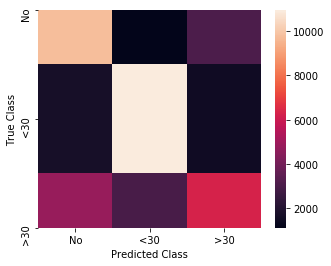

In [57]:
import matplotlib.pyplot as plt
import matplotlib.transforms

plt.figure(figsize=(5,4))
ax = sns.heatmap(cm)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [40]:
#FOR C2T1_Test.csv file

X_test=test1.drop(['encounter_id2','patient_nbr2','readmitted'],axis=1)

In [41]:
y_test=rfc_best.predict(X_test)

In [42]:
y_test=pd.DataFrame(y_test)

In [43]:
pred_test=test1[['encounter_id2','patient_nbr2','readmitted']]
pred_test=pred_test.reset_index(drop=True)

In [44]:
pred_test['readmitted']=y_test[0]

In [45]:
pred_test = pred_test.rename(columns={'encounter_id2':'encounter_id','patient_nbr2':'patient_nbr'})


In [46]:
pred_test['readmitted']=pred_test['readmitted'].replace(0,'No')
pred_test['readmitted']=pred_test['readmitted'].replace(1,'<30')
pred_test['readmitted']=pred_test['readmitted'].replace(2,'>30')


In [47]:
pred_test.to_csv('C2T1_Test_Labled_multiclass.csv', header=True, index=False)